In [2]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import torch
import os

In [2]:
with open("/home/ubuntu/gdrive/workspace/dataset_release/aligned_data/pose_labels/subject14_all_labels.cpl", "rb") as f:
    cpl = pickle.load(f)

cpl.keys()

dict_keys(['naive_gt_kps', 'refined_gt_kps', 'rgb_est_kps', 'radar_est_kps', 'imu_est_kps', 'rgb_avail_frames', 'radar_avail_frames', 'imu_avail_frames', 'gt_avail_frames', '2d_l_avail_frames', '2d_r_avail_frames', 'pose_2d_l', 'pose_2d_r', 'video_label', 'camera_matrix'])

In [3]:
cpl['refined_gt_kps'].shape

(6981, 3, 17)

In [3]:
radar_dir = "/home/ubuntu/gdrive/workspace/dataset_release/features/radar/"
radar_files = os.listdir(radar_dir)
radar_files

['subject10_featuremap.npy',
 'subject11_featuremap.npy',
 'subject12_featuremap.npy',
 'subject13_featuremap.npy',
 'subject14_featuremap.npy',
 'subject15_featuremap.npy',
 'subject16_featuremap.npy',
 'subject17_featuremap.npy',
 'subject18_featuremap.npy',
 'subject19_featuremap.npy',
 'subject1_featuremap.npy',
 'subject20_featuremap.npy',
 'subject2_featuremap.npy',
 'subject3_featuremap.npy',
 'subject4_featuremap.npy',
 'subject5_featuremap.npy',
 'subject6_featuremap.npy',
 'subject7_featuremap.npy',
 'subject8_featuremap.npy',
 'subject9_featuremap.npy']

In [6]:
radar_npy = np.load(os.path.join(radar_dir, "subject14_featuremap.npy"))
radar_npy.shape

(6812, 14, 14, 5)

In [4]:
for radar_file in radar_files:
    radar_npy = np.load(os.path.join(radar_dir, radar_file))
    print(radar_npy.shape)


(6911, 14, 14, 5)
(7101, 14, 14, 5)
(6526, 14, 14, 5)
(6876, 14, 14, 5)
(6812, 14, 14, 5)
(6557, 14, 14, 5)
(6722, 14, 14, 5)
(6387, 14, 14, 5)
(6942, 14, 14, 5)
(6780, 14, 14, 5)
(6384, 14, 14, 5)
(6677, 14, 14, 5)
(7150, 14, 14, 5)
(6982, 14, 14, 5)
(6893, 14, 14, 5)
(7219, 14, 14, 5)
(6906, 14, 14, 5)
(6743, 14, 14, 5)
(6817, 14, 14, 5)
(6704, 14, 14, 5)


In [2]:
# vid_filename = "/home/ubuntu/gdrive/workspace/blurred_videos/subject14_0505/subject14_color0.mp4"
# frame_number = 100
import cv2
import os
# list mp4 files recursively
for root, dirs, files in os.walk("/home/ubuntu/gdrive/workspace/blurred_videos/"):
    for file in files:
        if file.endswith(".mp4"):
            vid_filename = os.path.join(root, file)
            cap = cv2.VideoCapture(vid_filename)
            amount_of_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
            print(amount_of_frames)
            break
# for vid_filename in os.listdir("/home/ubuntu/gdrive/workspace/blurred_videos/"):
#     if vid_filename.endswith(".mp4"):
#         cap = cv2.VideoCapture(vid_filename)
# amount_of_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
# print(amount_of_frames)

6953.0
7334.0
6761.0
7026.0


In [9]:
print(cpl['rgb_avail_frames'])
print(cpl['radar_avail_frames'])


[0, 6980]
[145, 6956]


In [4]:
import os
frames_dir = "/home/ubuntu/gdrive/workspace/blurred_videos/subject14_0505/subject14_color0/"
frames = os.listdir(frames_dir)
len(frames)

7011

In [3]:
def plot_3d_skeleton(keypoints, connections, skeleton_on=True, elev=0, azim=0):  
    # Create a 3D plot  
    fig = plt.figure(figsize=(10,10))  
    ax = fig.add_subplot(111, projection='3d')  
  
    # Plot keypoints  
    ax.scatter(keypoints[0], keypoints[1], keypoints[2], c='r', marker='o')  

    # Annotate keypoints with their indices  
    for i, (x, y, z) in enumerate(zip(keypoints[0], keypoints[1], keypoints[2]), start=0):  
        ax.text(x, y, z, f'{i}', color='black')
  
    # Plot connections  
    if skeleton_on:
        for connection in connections:  
            point1 = keypoints[:, connection[0]]  
            point2 = keypoints[:, connection[1]]  
            ax.plot(
                [point1[0], point2[0]], 
                [point1[1], point2[1]], 
                [point1[2], point2[2]], 
                'b-'
            )  
            
    
    ax.set_xlim(-2, 2)
    ax.set_ylim(-2, 2)
    ax.set_zlim(-2, 2)
  
    # Set labels  
    ax.set_xlabel('X')  
    ax.set_ylabel('Y')  
    ax.set_zlabel('Z')  
  
    # plt.gca().invert_xaxis()
    # plt.gca().invert_yaxis()
    # plt.gca().invert_zaxis()

    # Set the view angle  
    # elev = 0  # Elevation angle  
    # azim = 45  # Azimuthal angle  
    ax.view_init(elev=elev, azim=azim)
    # Show plot  
    plt.show()  

In [4]:
import pandas as pd
df = pd.read_csv('/home/ubuntu/gdrive/workspace/dataset_release/raw_data/radar/subject1_0427.csv')
df.head()

,Frame #,# Obj,X,Y,Z,Doppler,Intensity,Time
0,19.0,12.0,0.975586,0.694336,0.089844,0.000000,6.0,1.651101e+09
1,19.0,12.0,0.999023,0.711914,0.088867,0.000000,6.0,1.651101e+09
2,19.0,12.0,0.975586,0.695312,0.083984,0.356004,11.0,1.651101e+09
3,19.0,12.0,0.999023,0.712891,0.076172,0.356004,11.0,1.651101e+09
4,19.0,12.0,1.023438,0.716797,0.157227,0.356004,8.0,1.651101e+09


float32


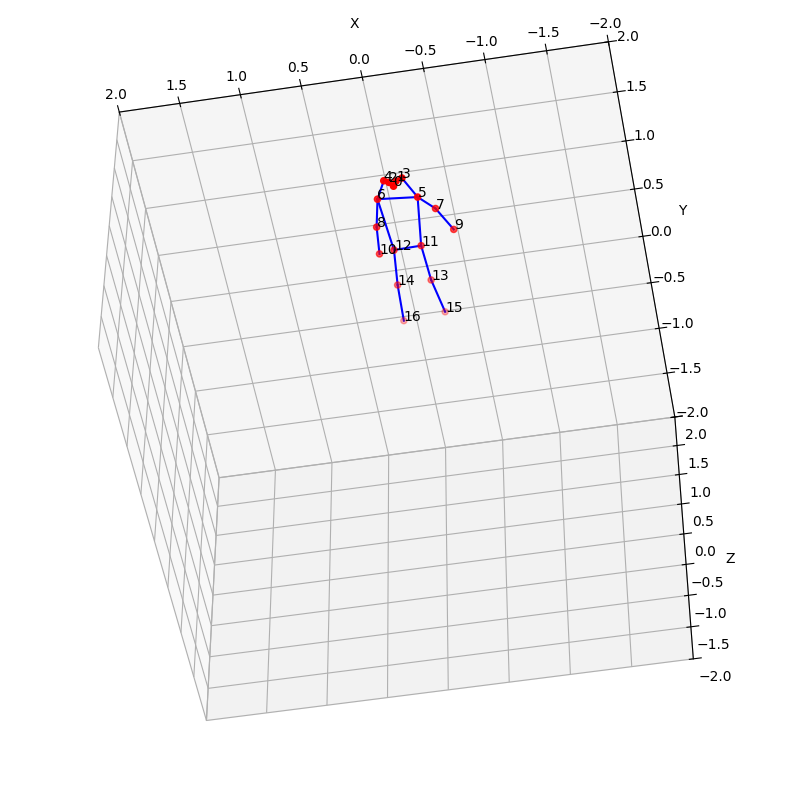

In [5]:
idx = 300
# keypoints = np.reshape(cpl['refined_gt_kps'][idx], (17, 3))  # Replace with your actual keypoints array  
keypoints = cpl['refined_gt_kps'][idx]
print(keypoints.dtype)
# Define connections between keypoints to form the skeleton  
connections = [
    (9,7), (7,5), (5,6), (6,8), (8,10),
    (5,3), (3,1), (1,0), (0,2), (2,4), (4,6),
    (5,11), (11,13), (13,15),
    (11,12),
    (6,12), (12,14), (14,16),
]
plot_3d_skeleton(keypoints, connections, skeleton_on=True, elev=310, azim=100)

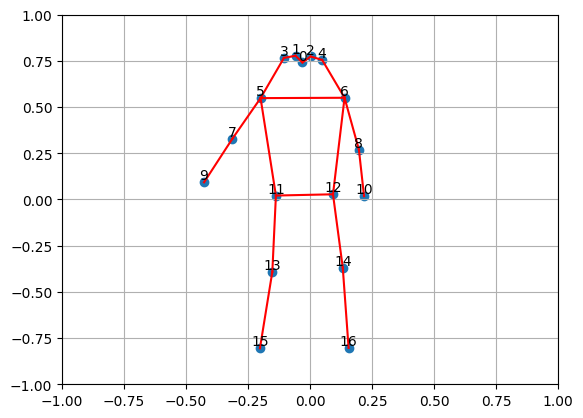

In [6]:
import numpy as np

pts = cpl['refined_gt_kps'][idx]
x_axis = 0
y_axis = 1

# Define the connections (pairs of indices)  
connections = [
    (9,7), (7,5), (5,6), (6,8), (8,10),
    (5,3), (3,1), (1,0), (0,2), (2,4), (4,6),
    (5,11), (11,13), (13,15),
    (11,12),
    (6,12), (12,14), (14,16),
]

fig, ax = plt.subplots()
# plt.gca().invert_yaxis()
ax.scatter(pts[x_axis], pts[y_axis])
for i, (x_coord, y_coord) in enumerate(zip(pts[x_axis], pts[y_axis]), start=0):
    plt.annotate(
        str(i), 
        (x_coord, y_coord), 
        textcoords="offset points", 
        xytext=(0, 2), 
        ha="center"
    )

# Plot the skeleton  
for connection in connections:  
    pt1 = pts[:, connection[0]]  
    pt2 = pts[:, connection[1]]  
    ax.plot([pt1[x_axis], pt2[x_axis]], [pt1[y_axis], pt2[y_axis]], 'r-')  
    
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
plt.grid()
plt.show()


In [9]:
vid_filename = "/home/ubuntu/gdrive/workspace/blurred_videos/subject14_0505/subject14_color0.mp4"
frame_number = 100
import cv2
cap = cv2.VideoCapture(vid_filename)
amount_of_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print(amount_of_frames)
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number-1)
res, frame = cap.read()
print(res)
frame.shape

6981.0
True


(1080, 1920, 3)

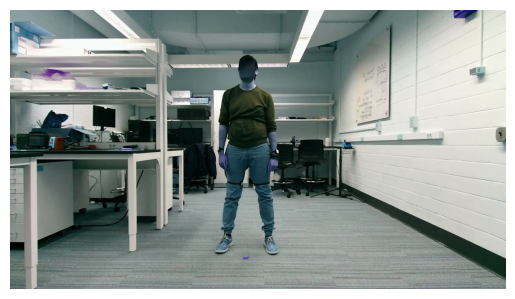

In [11]:
plt.imshow(frame)
plt.axis('off')
plt.show()


In [12]:
vid_filename = "/home/ubuntu/gdrive/workspace/blurred_videos/subject14_0505/subject14_color1.mp4"
frame_number = 100
import cv2
cap = cv2.VideoCapture(vid_filename)
amount_of_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print(amount_of_frames)
cap.set(cv2.CAP_PROP_POS_FRAMES, frame_number-1)
res, frame = cap.read()
print(res)
frame.shape

6981.0
True


(1080, 1920, 3)

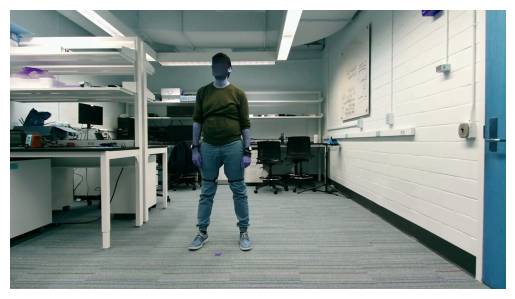

In [13]:
plt.imshow(frame)
plt.axis('off')
plt.show()


## Comparison

### Radar data

In [14]:
featuremap_validate = np.load('/home/ubuntu/gdrive/workspace/dataset_release/mri_radar_rede/data_tt.npy')  
labels_validate = np.load('/home/ubuntu/gdrive/workspace/dataset_release/mri_radar_rede/labels_tt.npy')  
featuremap_validate = torch.tensor(featuremap_validate, dtype=torch.float32)  
labels_validate = torch.tensor(labels_validate, dtype=torch.float32)  

n_keypoints = 51  



In [15]:
print(featuremap_validate.shape, labels_validate.shape)

torch.Size([27170, 14, 14, 5]) torch.Size([27170, 51])


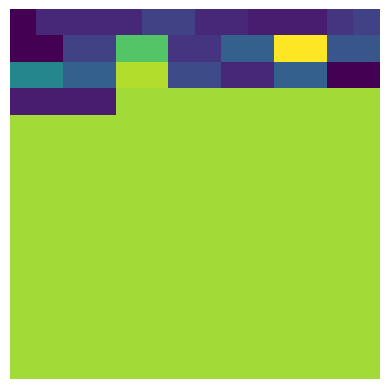

In [16]:
plt.imshow(featuremap_validate[100,:,:,4])
plt.axis('off')
plt.show()

In [17]:
import torch.nn as nn  

class CNN(nn.Module):  
    def __init__(self, in_shape, n_keypoints):  
        super(CNN, self).__init__()  
        self.conv1 = nn.Conv2d(in_shape[0], 16, kernel_size=3, padding=1)  
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  
        self.dropout = nn.Dropout(0.3)  
        self.batch_norm = nn.BatchNorm2d(32)  
        self.flatten = nn.Flatten()  
        self.fc1 = nn.Linear(32 * in_shape[1] * in_shape[2], 512)  
        self.fc2 = nn.Linear(512, n_keypoints)  
        self.fc_bn = nn.BatchNorm1d(512)  
        self.fc_dropout = nn.Dropout(0.4)  
  
    def forward(self, x):  
        x = torch.relu(self.conv1(x))  
        x = self.dropout(x)  
        x = torch.relu(self.conv2(x))  
        x = self.dropout(x)  
        x = self.batch_norm(x)  
        x = self.flatten(x)  
        x = torch.relu(self.fc1(x))  
        x = self.fc_bn(x)  
        x = self.fc_dropout(x)  
        x = self.fc2(x)  
        return x 
    
class CNN_LSTM(nn.Module):  
    def __init__(self, in_shape, n_keypoints, lstm_hidden_size, lstm_num_layers):  
        super(CNN_LSTM, self).__init__()  
          
        # CNN layers  
        self.conv1 = nn.Conv2d(in_shape[0], 16, kernel_size=3, padding=1)  
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  
        self.dropout = nn.Dropout(0.3)  
        self.batch_norm = nn.BatchNorm2d(32)  
        self.flatten = nn.Flatten()  
          
        # Calculate the size of the flattened feature map  
        self.feature_size = 32 * in_shape[1] * in_shape[2]  
          
        # LSTM layers  
        self.lstm = nn.LSTM(input_size=self.feature_size, hidden_size=lstm_hidden_size, num_layers=lstm_num_layers, batch_first=True)  
          
        # Fully connected layers  
        self.fc1 = nn.Linear(lstm_hidden_size, 512)  
        self.fc2 = nn.Linear(512, n_keypoints)  
        self.fc_bn = nn.BatchNorm1d(512)  
        self.fc_dropout = nn.Dropout(0.4)  
  
    def forward(self, x):  
        # Pass through CNN layers  
        x = torch.relu(self.conv1(x))  
        x = self.dropout(x)  
        x = torch.relu(self.conv2(x))  
        x = self.dropout(x)  
        x = self.batch_norm(x)  
        x = self.flatten(x)  
          
        # Reshape for LSTM input (batch_size, seq_len, feature_size)  
        x = x.view(x.size(0), -1, self.feature_size)  
          
        # Pass through LSTM layers  
        x, _ = self.lstm(x)  
          
        # Take the output of the last LSTM cell  
        x = x[:, -1, :]  
          
        # Pass through fully connected layers  
        x = torch.relu(self.fc1(x))  
        x = self.fc_bn(x)  
        x = self.fc_dropout(x)  
        x = self.fc2(x)  
          
        return x  

In [18]:
model = CNN(featuremap_validate[0].shape, n_keypoints)  

# lstm_hidden_size = 128  # Example LSTM hidden size  
# lstm_num_layers = 2  # Example number of LSTM layers 
# model = CNN_LSTM(featuremap_validate[0].shape, n_keypoints, lstm_hidden_size, lstm_num_layers)

model = model.cuda() if torch.cuda.is_available() else model 
model.load_state_dict(torch.load('model_mri_pytorch/MARS.pth')) 
# model.load_state_dict(torch.load('model_mri_pytorch-cnn_lstm-e300/MARS.pth')) 

/tmp/ipykernel_135674/1397672982.py:8: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_mri_pytorch/MARS.pth'))


<All keys matched successfully>

In [19]:
# Set the model to evaluation mode  
model.eval()  
  
# Perform inference  
with torch.no_grad():  
    outputs = model(featuremap_validate.cuda())  
  

# Print the outputs  
print(outputs.shape)  

torch.Size([27170, 51])


In [20]:
# labels_validate[idx].cpu().numpy().shape
outputs[idx].shape

torch.Size([51])

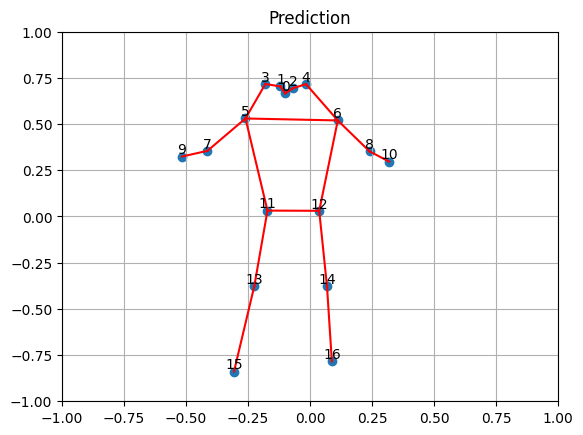

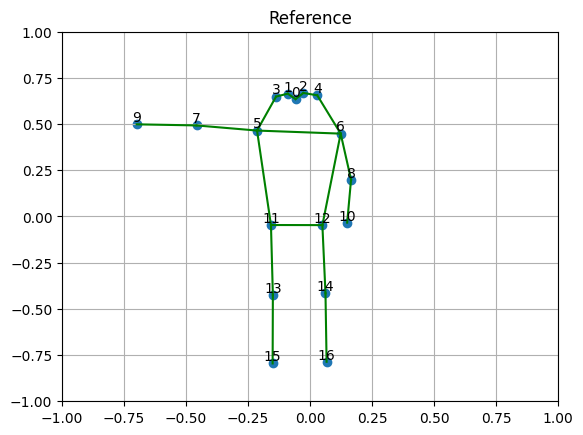

In [21]:
idx = 100
x_axis = 0
y_axis = 1
connections = [
    (9,7), (7,5), (5,6), (6,8), (8,10),
    (5,3), (3,1), (1,0), (0,2), (2,4), (4,6),
    (5,11), (11,13), (13,15),
    (11,12),
    (6,12), (12,14), (14,16),
]

fig, ax = plt.subplots()

################ Plot prediction ################
pts = np.reshape(outputs[idx].cpu().numpy(), (3,17))
ax.scatter(pts[x_axis], pts[y_axis])
for i, (x_coord, y_coord) in enumerate(zip(pts[x_axis], pts[y_axis]), start=0):
    plt.annotate(
        str(i), 
        (x_coord, y_coord), 
        textcoords="offset points", 
        xytext=(0, 2), 
        ha="center"
    )

# Plot the skeleton  
for connection in connections:  
    pt1 = pts[:, connection[0]]  
    pt2 = pts[:, connection[1]]  
    ax.plot([pt1[x_axis], pt2[x_axis]], [pt1[y_axis], pt2[y_axis]], 'r-') 
    
plt.title("Prediction")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
plt.grid()
plt.show()


fig, ax = plt.subplots()
################ Plot reference ################
pts = np.reshape(labels_validate[idx].cpu().numpy(), (3,17))
ax.scatter(pts[x_axis], pts[y_axis])
for i, (x_coord, y_coord) in enumerate(zip(pts[x_axis], pts[y_axis]), start=0):
    plt.annotate(
        str(i), 
        (x_coord, y_coord), 
        textcoords="offset points", 
        xytext=(0, 2), 
        ha="center"
    )

# Plot the skeleton  
for connection in connections:  
    pt1 = pts[:, connection[0]]  
    pt2 = pts[:, connection[1]]  
    ax.plot([pt1[x_axis], pt2[x_axis]], [pt1[y_axis], pt2[y_axis]], 'g-')  
    
plt.title("Reference")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
plt.grid()
plt.show()

float32


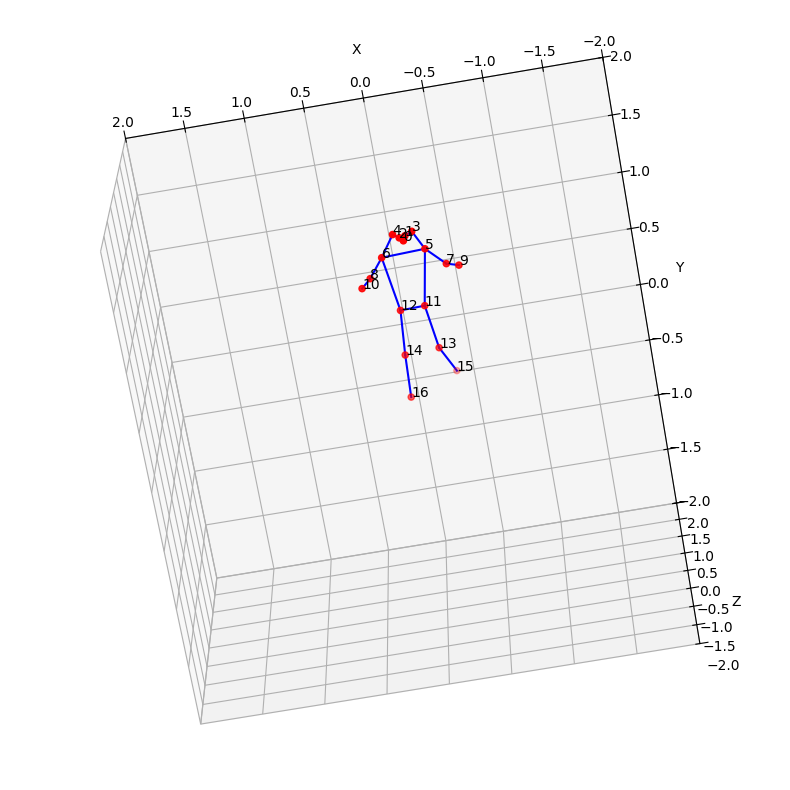

In [23]:
idx = 100
# keypoints = cpl['refined_gt_kps'][idx]
# keypoints = np.reshape(outputs[idx].cpu().numpy(), (3,17))
keypoints = outputs[idx].view(3,17).cpu().numpy()
print(keypoints.dtype)

# Define connections between keypoints to form the skeleton  
connections = [
    (9,7), (7,5), (5,6), (6,8), (8,10),
    (5,3), (3,1), (1,0), (0,2), (2,4), (4,6),
    (5,11), (11,13), (13,15),
    (11,12),
    (6,12), (12,14), (14,16),
]
plot_3d_skeleton(keypoints, connections, skeleton_on=True, elev=290, azim=100)

### RGB data

In [7]:
label_dirs = "/home/ubuntu/gdrive/workspace/dataset_release/aligned_data/pose_labels/"
video_dirs = "/home/ubuntu/gdrive/workspace/blurred_videos/"

n_keypoints = 51  

In [8]:
with open(label_dirs + "subject14_all_labels.cpl", "rb") as f:
    cpl = pickle.load(f)

cpl.keys()

dict_keys(['naive_gt_kps', 'refined_gt_kps', 'rgb_est_kps', 'radar_est_kps', 'imu_est_kps', 'rgb_avail_frames', 'radar_avail_frames', 'imu_avail_frames', 'gt_avail_frames', '2d_l_avail_frames', '2d_r_avail_frames', 'pose_2d_l', 'pose_2d_r', 'video_label', 'camera_matrix'])

6981.0
True


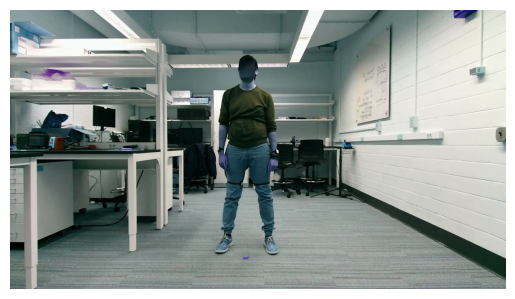

6981.0
True


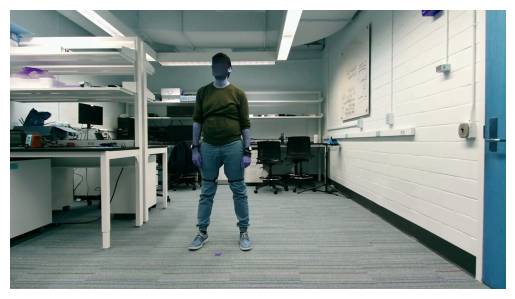

In [9]:
import cv2
frame0_path = video_dirs + "subject14_0505/subject14_color0.mp4"
frame1_path = video_dirs + "subject14_0505/subject14_color1.mp4"

frame_number = 100

cap0 = cv2.VideoCapture(frame0_path)
amount_of_frames0 = cap0.get(cv2.CAP_PROP_FRAME_COUNT)
print(amount_of_frames0)
cap0.set(cv2.CAP_PROP_POS_FRAMES, frame_number-1)
res0, frame0 = cap0.read()
print(res0)
frame0.shape
plt.imshow(frame0)
plt.axis('off')
plt.show()

cap1 = cv2.VideoCapture(frame1_path)
amount_of_frames1 = cap1.get(cv2.CAP_PROP_FRAME_COUNT)
print(amount_of_frames1)
cap1.set(cv2.CAP_PROP_POS_FRAMES, frame_number-1)
res1, frame1 = cap1.read()
print(res1)
frame1.shape
plt.imshow(frame1)
plt.axis('off')
plt.show()

In [10]:
import torch.nn as nn
class CNNRGB(nn.Module):  
    def __init__(self, in_shape, n_keypoints):  
        super(CNNRGB, self).__init__()  
        self.conv1 = nn.Conv2d(in_shape[0], 16, kernel_size=3, padding=1)  
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, padding=1)  
        self.dropout = nn.Dropout(0.3)  
        self.layer_norm = nn.LayerNorm([32, in_shape[1], in_shape[2]])  # Replace BatchNorm2d
        self.flatten = nn.Flatten()  
        self.fc1 = nn.Linear(32 * in_shape[1] * in_shape[2], 512)  
        self.fc2 = nn.Linear(512, n_keypoints)  
        self.fc_ln = nn.LayerNorm(512)  # Replace BatchNorm1d
        self.fc_dropout = nn.Dropout(0.4)  
  
    def forward(self, x):  
        x = torch.relu(self.conv1(x))  
        x = self.dropout(x)  
        x = torch.relu(self.conv2(x))  
        x = self.dropout(x)  
        x = self.layer_norm(x)  # Use LayerNorm instead of BatchNorm
        x = self.flatten(x)  
        x = torch.relu(self.fc1(x))  
        x = self.fc_ln(x)  # Use LayerNorm instead of BatchNorm
        x = self.fc_dropout(x)  
        x = self.fc2(x)  
        return x 

In [14]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((128, 128)),  # Adjust size as needed
    transforms.ToTensor(),
])
# combine frame0 and frame1
frame0 = cv2.cvtColor(frame0, cv2.COLOR_BGR2RGB)
frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2RGB)
frame0 = transform(frame0)
frame1 = transform(frame1)
frame = torch.cat((frame0, frame1), dim=0)
frame.shape

torch.Size([6, 128, 128])

In [15]:
# add batch dimension
frame = frame.unsqueeze(0)
frame.shape

torch.Size([1, 6, 128, 128])

In [18]:
model = CNNRGB(frame[0].shape, n_keypoints)

model = model.cuda() if torch.cuda.is_available() else model 
model.load_state_dict(torch.load('model_mri_pytorch-RGB-e200/MARS.pth')) 
# model.load_state_dict(torch.load('model_mri_pytorch-cnn_lstm-e300/MARS.pth')) 

/tmp/ipykernel_81078/1748355299.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_mri_pytorch-RGB-e200/MARS.pth'))


<All keys matched successfully>

In [19]:
# Set the model to evaluation mode  
model.eval()  
  
# Perform inference  
with torch.no_grad():  
    outputs = model(frame.cuda())  
  

# Print the outputs  
print(outputs.shape)  

torch.Size([1, 51])


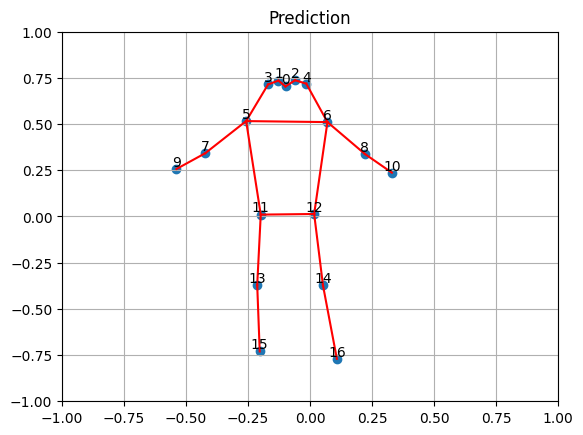

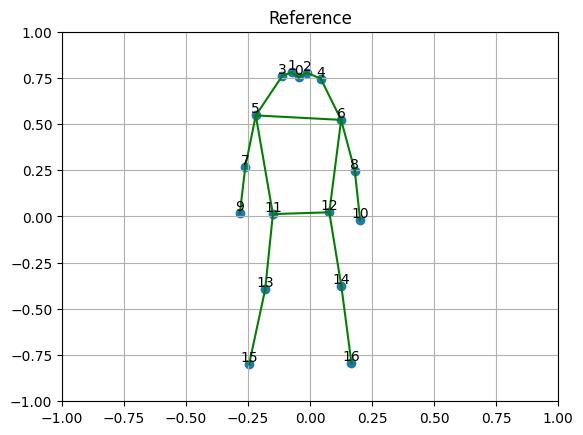

In [20]:
x_axis = 0
y_axis = 1
connections = [
    (9,7), (7,5), (5,6), (6,8), (8,10),
    (5,3), (3,1), (1,0), (0,2), (2,4), (4,6),
    (5,11), (11,13), (13,15),
    (11,12),
    (6,12), (12,14), (14,16),
]

fig, ax = plt.subplots()

################ Plot prediction ################
pts = np.reshape(outputs.cpu().numpy(), (3,17))
ax.scatter(pts[x_axis], pts[y_axis])
for i, (x_coord, y_coord) in enumerate(zip(pts[x_axis], pts[y_axis]), start=0):
    plt.annotate(
        str(i), 
        (x_coord, y_coord), 
        textcoords="offset points", 
        xytext=(0, 2), 
        ha="center"
    )

# Plot the skeleton  
for connection in connections:  
    pt1 = pts[:, connection[0]]  
    pt2 = pts[:, connection[1]]  
    ax.plot([pt1[x_axis], pt2[x_axis]], [pt1[y_axis], pt2[y_axis]], 'r-') 
    
plt.title("Prediction")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
plt.grid()
plt.show()


fig, ax = plt.subplots()
################ Plot reference ################
pts = np.reshape(cpl['refined_gt_kps'][frame_number], (3,17))
ax.scatter(pts[x_axis], pts[y_axis])
for i, (x_coord, y_coord) in enumerate(zip(pts[x_axis], pts[y_axis]), start=0):
    plt.annotate(
        str(i), 
        (x_coord, y_coord), 
        textcoords="offset points", 
        xytext=(0, 2), 
        ha="center"
    )

# Plot the skeleton  
for connection in connections:  
    pt1 = pts[:, connection[0]]  
    pt2 = pts[:, connection[1]]  
    ax.plot([pt1[x_axis], pt2[x_axis]], [pt1[y_axis], pt2[y_axis]], 'g-')  
    
plt.title("Reference")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
plt.grid()
plt.show()

float32


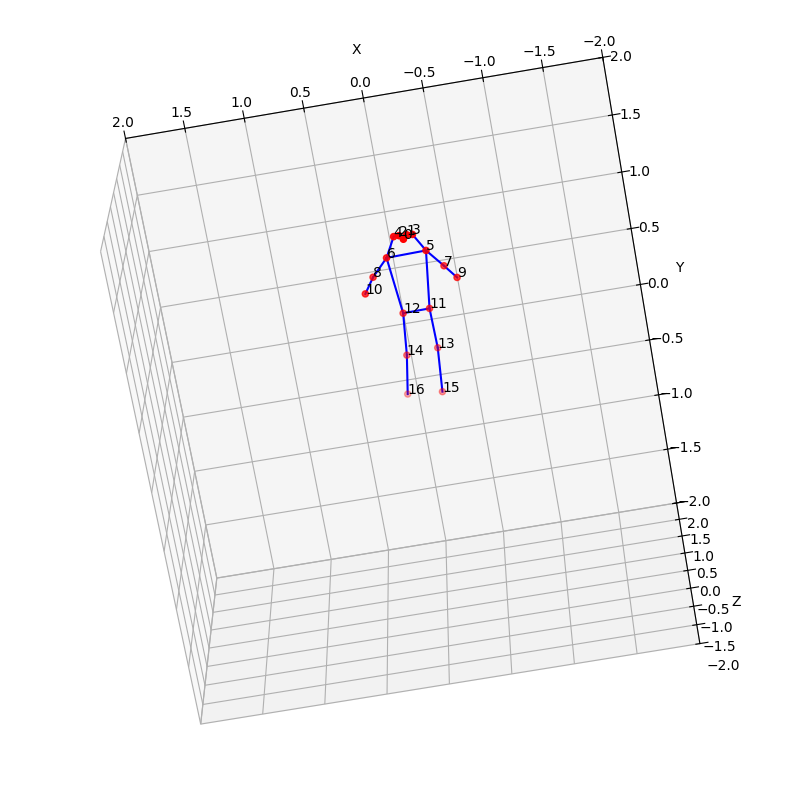

In [40]:
keypoints = outputs.view(3,17).cpu().numpy()
print(keypoints.dtype)

# Define connections between keypoints to form the skeleton  
connections = [
    (9,7), (7,5), (5,6), (6,8), (8,10),
    (5,3), (3,1), (1,0), (0,2), (2,4), (4,6),
    (5,11), (11,13), (13,15),
    (11,12),
    (6,12), (12,14), (14,16),
]
plot_3d_skeleton(keypoints, connections, skeleton_on=True, elev=290, azim=100)

## Grayscale data

6981.0
True


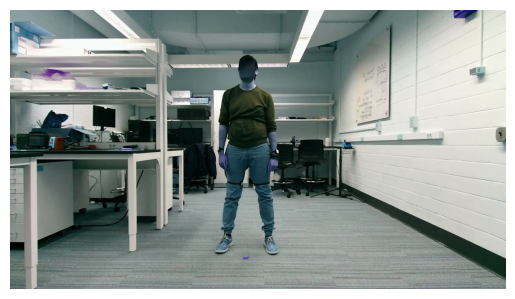

6981.0
True


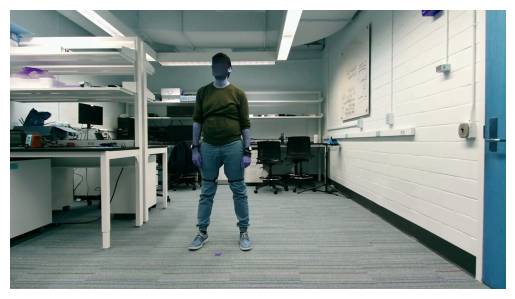

In [12]:
import cv2
frame0_path = video_dirs + "subject14_0505/subject14_color0.mp4"
frame1_path = video_dirs + "subject14_0505/subject14_color1.mp4"

frame_number = 100

cap0 = cv2.VideoCapture(frame0_path)
amount_of_frames0 = cap0.get(cv2.CAP_PROP_FRAME_COUNT)
print(amount_of_frames0)
cap0.set(cv2.CAP_PROP_POS_FRAMES, frame_number-1)
res0, frame0 = cap0.read()
print(res0)
frame0.shape
plt.imshow(frame0)
plt.axis('off')
plt.show()

cap1 = cv2.VideoCapture(frame1_path)
amount_of_frames1 = cap1.get(cv2.CAP_PROP_FRAME_COUNT)
print(amount_of_frames1)
cap1.set(cv2.CAP_PROP_POS_FRAMES, frame_number-1)
res1, frame1 = cap1.read()
print(res1)
frame1.shape
plt.imshow(frame1)
plt.axis('off')
plt.show()

In [13]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((160, 160)),  # Adjust size as needed
    transforms.ToTensor(),
])
# combine frame0 and frame1
frame0 = cv2.cvtColor(frame0, cv2.COLOR_BGR2GRAY)
frame1 = cv2.cvtColor(frame1, cv2.COLOR_BGR2GRAY)
frame0 = transform(frame0)
frame1 = transform(frame1)
frame = torch.cat((frame0, frame1), dim=0)
frame.shape

torch.Size([2, 160, 160])

In [14]:
# add batch dimension
frame = frame.unsqueeze(0)
frame.shape

torch.Size([1, 2, 160, 160])

In [16]:
model = CNNRGB(frame[0].shape, n_keypoints)

model = model.cuda() if torch.cuda.is_available() else model 
model.load_state_dict(torch.load('model_mri_pytorch-RGB-Gray-e150-160/MARS.pth')) 

/tmp/ipykernel_521401/1108800095.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model_mri_pytorch-RGB-Gray-e150-160/MARS.pth'))


<All keys matched successfully>

In [17]:
# Set the model to evaluation mode  
model.eval()  
  
# Perform inference  
with torch.no_grad():  
    outputs = model(frame.cuda())  
  

# Print the outputs  
print(outputs.shape)  

torch.Size([1, 51])


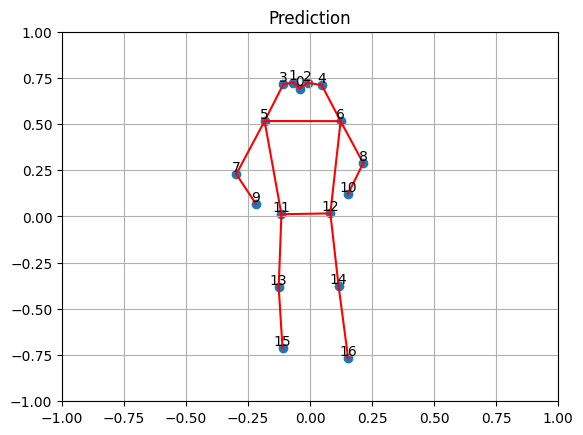

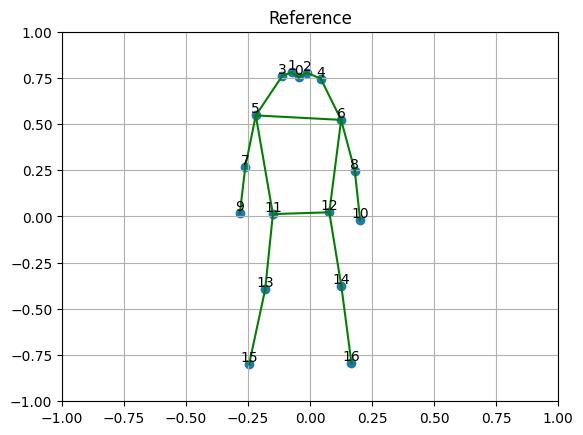

In [18]:
x_axis = 0
y_axis = 1
connections = [
    (9,7), (7,5), (5,6), (6,8), (8,10),
    (5,3), (3,1), (1,0), (0,2), (2,4), (4,6),
    (5,11), (11,13), (13,15),
    (11,12),
    (6,12), (12,14), (14,16),
]

fig, ax = plt.subplots()

################ Plot prediction ################
pts = np.reshape(outputs.cpu().numpy(), (3,17))
ax.scatter(pts[x_axis], pts[y_axis])
for i, (x_coord, y_coord) in enumerate(zip(pts[x_axis], pts[y_axis]), start=0):
    plt.annotate(
        str(i), 
        (x_coord, y_coord), 
        textcoords="offset points", 
        xytext=(0, 2), 
        ha="center"
    )

# Plot the skeleton  
for connection in connections:  
    pt1 = pts[:, connection[0]]  
    pt2 = pts[:, connection[1]]  
    ax.plot([pt1[x_axis], pt2[x_axis]], [pt1[y_axis], pt2[y_axis]], 'r-') 
    
plt.title("Prediction")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
plt.grid()
plt.show()


fig, ax = plt.subplots()
################ Plot reference ################
pts = np.reshape(cpl['refined_gt_kps'][frame_number], (3,17))
ax.scatter(pts[x_axis], pts[y_axis])
for i, (x_coord, y_coord) in enumerate(zip(pts[x_axis], pts[y_axis]), start=0):
    plt.annotate(
        str(i), 
        (x_coord, y_coord), 
        textcoords="offset points", 
        xytext=(0, 2), 
        ha="center"
    )

# Plot the skeleton  
for connection in connections:  
    pt1 = pts[:, connection[0]]  
    pt2 = pts[:, connection[1]]  
    ax.plot([pt1[x_axis], pt2[x_axis]], [pt1[y_axis], pt2[y_axis]], 'g-')  
    
plt.title("Reference")
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
plt.grid()
plt.show()